### Import your librares

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Load your dataset

In [2]:
df = pd.read_csv('seattle_weather.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


``` 
PRCP = Precipitation
TMAX = Temperature Max
TMIN = Temperature Min
```

### Handle missing data in PRCP and RAIN columns

In [3]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
df[pd.isnull(df.PRCP)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [6]:
df.loc[18410:18420]

,DATE,PRCP,TMAX,TMIN,RAIN
18410,1998-05-28,0.0,68,44,False
18411,1998-05-29,0.0,64,51,False
18412,1998-05-30,0.0,61,52,False
18413,1998-05-31,0.0,73,48,False
18414,1998-06-01,0.0,62,51,False
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
18417,1998-06-04,0.0,60,53,False
18418,1998-06-05,0.0,66,53,False
18419,1998-06-06,0.0,75,52,False


In [7]:
df.loc[21060:21070]

,DATE,PRCP,TMAX,TMIN,RAIN
21060,2005-08-29,0.03,69,56,True
21061,2005-08-30,0.00,67,55,False
21062,2005-08-31,0.00,75,57,False
21063,2005-09-01,0.00,78,57,False
21064,2005-09-02,0.00,72,54,False
21065,2005-09-03,0.00,71,53,False
21066,2005-09-04,0.00,68,53,False
21067,2005-09-05,NaN,70,52,NaN
21068,2005-09-06,0.00,73,52,False
21069,2005-09-07,0.00,77,52,False


In [8]:
df['PRCP'].fillna(method='ffill', inplace=True)
df['RAIN'].fillna(method='ffill', inplace=True)

In [9]:
df.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


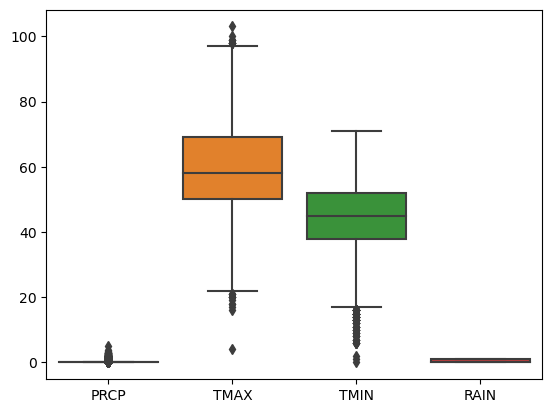

In [10]:
sns.boxplot(data=df);

## PRCP

### KeyError: 0 building boxplot

When attempting to create a boxplot, I receive KeyError: 0.

tldr; Plot tries to go from index 0 onwards, which doesn't work for named columns or slices, etc... Using .values or reseting the index will solve this.

`A workaround` would be sns.boxplot(df['ColA'].values)

[KeyError: 0L building boxplot - stackoverflow](https://stackoverflow.com/questions/37032972/keyerror-0l-building-boxplot)

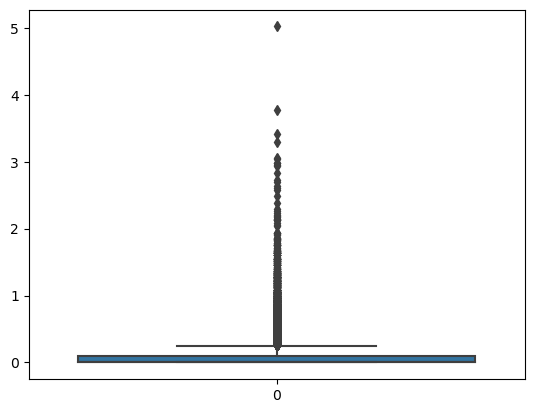

In [11]:
sns.boxplot(df['PRCP'].values);

In [12]:
Q1 = np.percentile(df['PRCP'], 25, interpolation='midpoint')
Q3 = np.percentile(df['PRCP'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers ', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers  0.25


In [13]:
df = df.drop(df[(df['PRCP'] > 0.25) | (df['PRCP'] < -0.15)].index)

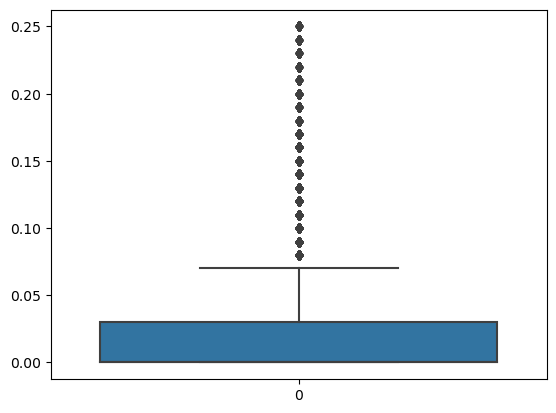

In [14]:
sns.boxplot(df['PRCP'].values);

## TMAX

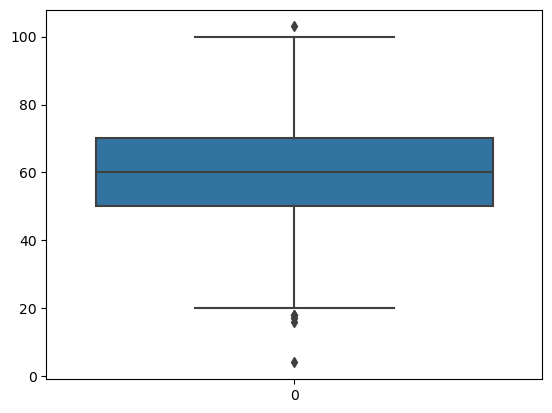

In [15]:
sns.boxplot(df['TMAX'].values);

In [16]:
Q1 = np.percentile(df['TMAX'], 25, interpolation='midpoint')
Q3 = np.percentile(df['TMAX'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers ', Q3 + 1.5*(IQR))

lower bound outliers  20.0
higher bound outliers  100.0


In [17]:
df = df.drop(df[(df['TMAX'] > 100.0) | (df['TMAX'] < 20.0)].index)

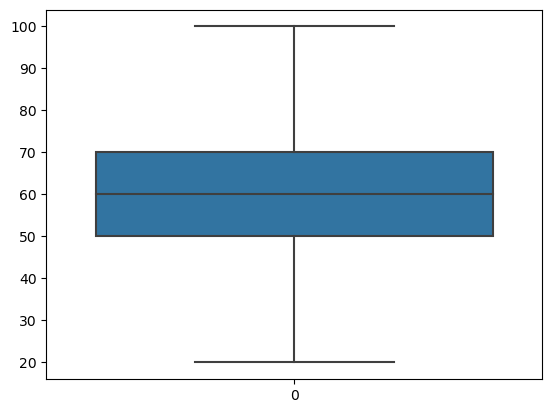

In [18]:
sns.boxplot(df['TMAX'].values);

## TMIN

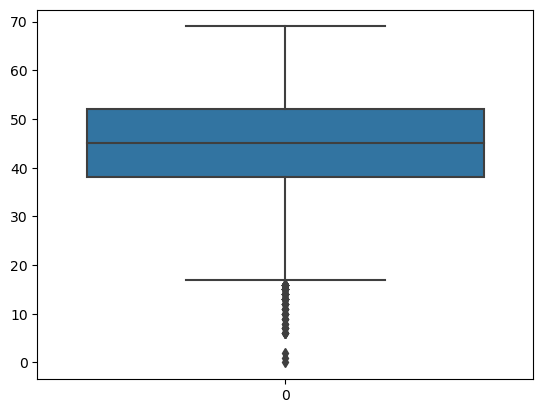

In [19]:
sns.boxplot(df['TMIN'].values);

In [20]:
Q1 = np.percentile(df['TMIN'], 25, interpolation='midpoint')
Q3 = np.percentile(df['TMIN'], 75, interpolation='midpoint')
IQR = Q3 - Q1

print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers ', Q3 + 1.5*(IQR))

lower bound outliers  17.0
higher bound outliers  73.0


In [21]:
df = df.drop(df[(df['TMIN'] > 73.0) | (df['TMIN'] < 17.0)].index)

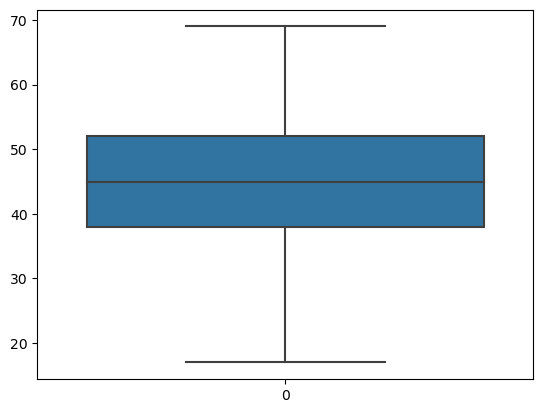

In [22]:
sns.boxplot(df['TMIN'].values);

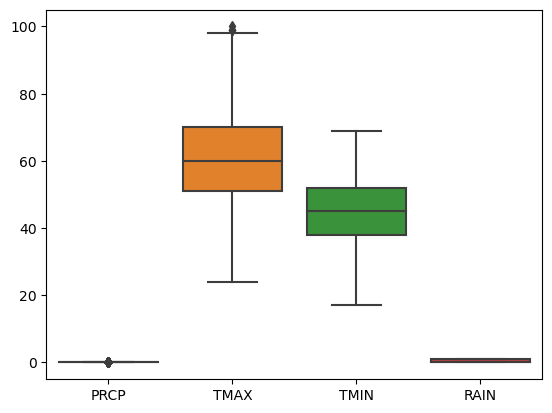

In [23]:
sns.boxplot(data=df);